In [1]:
from elos.elo_tracker import EloTracker
from utils.utils import load_all_games_csv, get_teams, plot_elo_ratings_over_time

# Preliliminary Exploration

This is a proof-of-concept notebook of building a working system of Elo updates using just the 2024 MLB season.

## Get all Games

In [2]:
all_games = load_all_games_csv('../data/gameinfo_cleaned.csv')

/Users/lancehendricks/Documents/College Coding/ML/Elo Ratings/src/utils/utils.py:16: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  all_games = pd.read_csv(filename)


## Get 2024 Season Games

In [3]:
games_24 = all_games[all_games['season']==2024]
games_24.head()

,gid,visteam,hometeam,site,date,number,starttime,daynight,innings,tiebreaker,...,wteam,lteam,line,batteries,lineups,box,pbp,season,homewon,timestamp
216227,SDN202403200,LAN,SDN,SEO01,20240320,0.0,7:05PM,night,9.0,2.0,...,LAN,SDN,y,both,y,y,y,2024,0,2024-03-20 19:05:00
216228,LAN202403210,SDN,LAN,SEO01,20240321,0.0,7:05PM,night,9.0,2.0,...,SDN,LAN,y,both,y,y,y,2024,0,2024-03-21 19:05:00
216229,ARI202403280,COL,ARI,PHO01,20240328,0.0,7:10PM,night,9.0,2.0,...,ARI,COL,y,both,y,y,y,2024,1,2024-03-28 19:10:00
216230,BAL202403280,ANA,BAL,BAL12,20240328,0.0,3:05PM,day,9.0,2.0,...,BAL,ANA,y,both,y,y,y,2024,1,2024-03-28 15:05:00
216231,CHA202403280,DET,CHA,CHI12,20240328,0.0,3:10PM,day,9.0,2.0,...,DET,CHA,y,both,y,y,y,2024,0,2024-03-28 15:10:00


## Elo Ratings Updates for 2024 Season

In [4]:
teams = get_teams(games_24)
et = EloTracker(teams)

et.add_history(games_24)

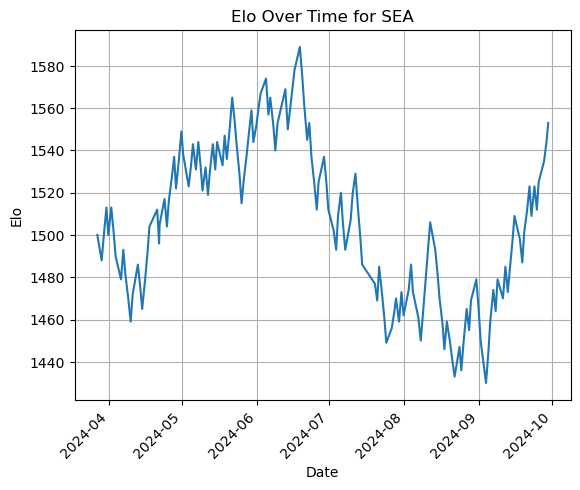

In [10]:
# Example: Mariners
plot_elo_ratings_over_time('SEA', et.elos_map)